## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#Approach


*  With being provided with two datasets,the first one containing the information regarding the details of the apps.The second dataset contains the information about user reviews of some of the apps in first dataset.
*   First it's required to explore the type of data present in the dataset and 
get the summary statistics of corresponding columns in the whole dataset.


*   Once we are able to understand the contents in each column , we can identify and handle Null and error values through data cleaning.
* The data will be cleaned after converting each columns to appropriate datatypes.


*   Using various data visualisation tools on both dataset we can get insights regarding kind of relation between each column and both datasets.
*   From this insights we derive conclusions that responsible for succes of an app 






#Exploring Datasets

In [49]:
#importing the required libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')

In [50]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
#Reading the csv file.
df1=pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')


In [52]:
# Viewing the top 10 rows of the dataframe
df1.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


In [53]:
# Viewing the bottom 10 rows of the dataframe
df1.tail(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10832,FR Tides,WEATHER,3.8,1195,582k,"100,000+",Free,0,Everyone,Weather,"February 16, 2014",6.0,2.1 and up
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,619k,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [54]:
# Finding the number of rows and columns in the given dataset
df1.shape

(10841, 13)

The first dataset contains 10841 rows and 13 columns.THe columns of the dataset will be explored to get insights.

**Let us first define what information the columns contain based on our inspection.**


* `App`: Contains the name of the apps.
* `Category`: It gives the category to the app.
* `Rating`: It contains the average rating the respective app received from its users.
* `Reviews`: It contains the number of users that have dropped a review for the respective app.
* `Size`: It contains the the disk space required to install the respective app.
* `Installs`: It gives the rounded figure of number of times the respective app was downloaded.
* `Type`: It states whether an app is free to use or paid.
* `Price`: It gives the price payable to install the app. For free type apps, the price is zero.
* `Content rating`: It states whether or not an app is suitable for all age groups or not.
* `Genres`: It gives the genre(s) to which the respective app belongs.
* `Last updated`: It gives the day in which the latest update was released.
* `Current Ver`: It gives the current version of the respective app.
* `Android Ver`: It gives the android version of the respective app.

In [55]:

df2=pd.read_csv('/content/drive/MyDrive/User Reviews.csv')

df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [56]:
df1['Rating'].describe() 

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [57]:
df1.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# Cleaning Data

##Removing null values


*  Rating,
current version,
Android version,
Content rating ,
type,


In [58]:
missing_data_values=df1.isnull().sum()
missing_data_values[missing_data_values != 0].sort_values(ascending=False)


Rating            1474
Current Ver          8
Android Ver          3
Content Rating       1
Type                 1
dtype: int64

In [59]:
#defining a function that would help in info regarding dtype, Null values ,Unique values
def get_info():
  df=pd.DataFrame(index=df1.columns)
  df['dtype']=df1.dtypes
  df['NUll Values']=df1.isnull().sum()
  df['Unique Values']=df1.nunique()
  return df


In [60]:
get_info()

,dtype,NUll Values,Unique Values
App,object,0,9660
Category,object,0,34
Rating,float64,1474,40
Reviews,object,0,6002
Size,object,0,462
Installs,object,0,22
Type,object,1,3
Price,object,0,93
Content Rating,object,1,6
Genres,object,0,120


In [61]:
#removing null values
df1.Type.fillna(method='ffill',inplace=True)
df1['Content Rating'].fillna(method='ffill',inplace=True)
df1.Rating.fillna(df1.Rating.mean(),inplace=True)


In [62]:
df1[df1.Rating>5]
df1.drop([10472],inplace=True)

In [63]:
# The columns Current ver , Android Ver ,  LastUpdated may not be useful ,so it can be dropped
df1.drop(['Current Ver','Android Ver','Last Updated'], axis=1,inplace=True)

In [64]:
#Columns like Reviews,size,Installs and Price can have numeric datatype. So converting it from object to int
df1['Reviews'] = df1['Reviews'].astype('float64')


In [65]:
df1["Size"]=df1["Size"].apply(lambda x : x.replace('M','e+6'))
df1["Size"]=df1["Size"].apply(lambda x : x.replace('k','e+3'))
df1["Size"]=df1["Size"].fillna('ffill')
df1["Size"]=df1["Size"].replace('Varies with device', '0')
df1['Size']=pd.to_numeric(df1['Size'])





In [66]:
df1['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+06, 2.50e+07, 2.80e+06, 5.60e+06,
       2.90e+07, 3.30e+07, 3.10e+06, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+06, 5.50e+06, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+06, 7.00e+06, 2.30e+07, 6.00e+06, 6.10e+06,
       4.60e+06, 9.20e+06, 5.20e+06, 1.10e+07, 2.40e+07, 0.00e+00,
       9.40e+06, 1.50e+07, 1.00e+07, 1.20e+06, 2.60e+07, 8.00e+06,
       7.90e+06, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+06, 5.70e+06, 8.60e+06, 2.40e+06, 2.70e+07, 2.50e+06,
       1.60e+07, 3.40e+06, 8.90e+06, 3.90e+06, 2.90e+06, 3.80e+07,
       3.20e+07, 5.40e+06, 1.80e+07, 1.10e+06, 2.20e+06, 4.50e+06,
       9.80e+06, 5.20e+07, 9.00e+06, 6.70e+06, 3.00e+07, 2.60e+06,
       7.10e+06, 3.70e+06, 2.20e+07, 7.40e+06, 6.40e+06, 3.20e+06,
       8.20e+06, 9.90e+06, 4.90e+06, 9.50e+06, 5.00e+06, 5.90e+06,
       1.30e+07, 7.30e+07, 6.80e+06, 3.50e+06, 4.00e+06, 2.30e+06,
       7.20e+06, 2.10e+06, 4.20e+07, 7.30e+06, 9.10e+06, 5.50e

In [67]:
df1['Installs']=df1.Installs.apply(lambda x:x.strip('+'))
df1['Installs']=df1.Installs.apply(lambda x:x.replace(',',''))







In [68]:
df1['Installs']=df1['Installs'].astype(float)
df1['Installs']

0           10000.0
1          500000.0
2         5000000.0
3        50000000.0
4          100000.0
            ...    
10836        5000.0
10837         100.0
10838        1000.0
10839        1000.0
10840    10000000.0
Name: Installs, Length: 10840, dtype: float64

In [69]:
#price
df1['Price'] = df1.Price.str.replace('$','').astype('float64')

In [70]:
get_info()

,dtype,NUll Values,Unique Values
App,object,0,9659
Category,object,0,33
Rating,float64,0,40
Reviews,float64,0,6001
Size,float64,0,460
Installs,float64,0,20
Type,object,0,2
Price,float64,0,92
Content Rating,object,0,6
Genres,object,0,119


In [71]:
df2.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [72]:
def get_info2():
  df=pd.DataFrame(index=df2.columns)
  df['dtype']=df2.dtypes
  df['NUll Values']=df2.isnull().sum()
  df['Not NUll Values']=df2.notnull().sum()
  df['Unique Values']=df2.nunique()
  return df


In [73]:
get_info2()

,dtype,NUll Values,Not NUll Values,Unique Values
App,object,0,64295,1074
Translated_Review,object,26868,37427,27994
Sentiment,object,26863,37432,3
Sentiment_Polarity,float64,26863,37432,6195
Sentiment_Subjectivity,float64,26863,37432,4530


As there are lot of null values.Its better to drop the rows having null values

In [74]:
df2.dropna(axis=0 ,how='any',inplace=True)
df2.drop(['Translated_Review'] ,axis=1 ,inplace=True)


#Data Visualisation


Text(0.5, 1.0, 'Total app installs in each category')

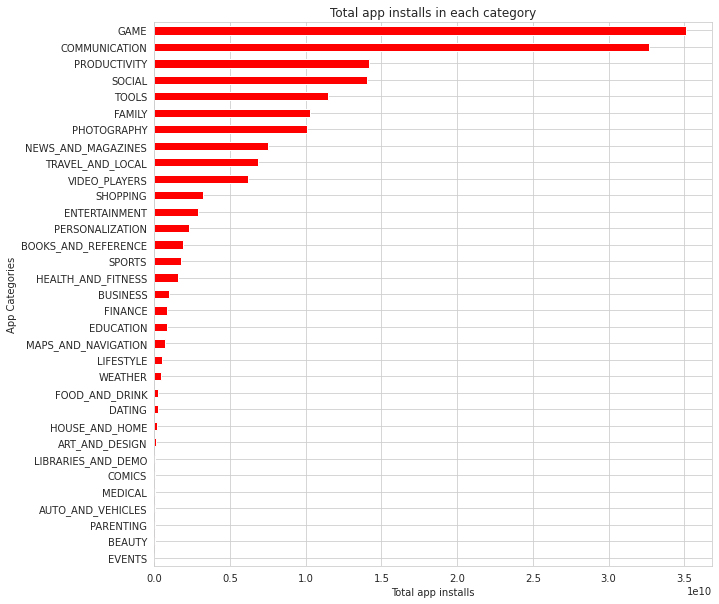

In [75]:
grp=df1.groupby('Category')['Installs'].agg(np.sum).sort_values(ascending=True)
grp.plot.barh(figsize=(10,10), color = 'r')
plt.xlabel('Total app installs')
plt.ylabel('App Categories')
plt.xticks()
plt.title('Total app installs in each category')



In [76]:
df1.groupby('Category')

In [77]:
label = df1['Category'].value_counts().index
size =df1['Category'].value_counts()
labels = []
sizes = []
for i in range(len(label)):
    labels.append(label[i])
    sizes.append(size[i])
  

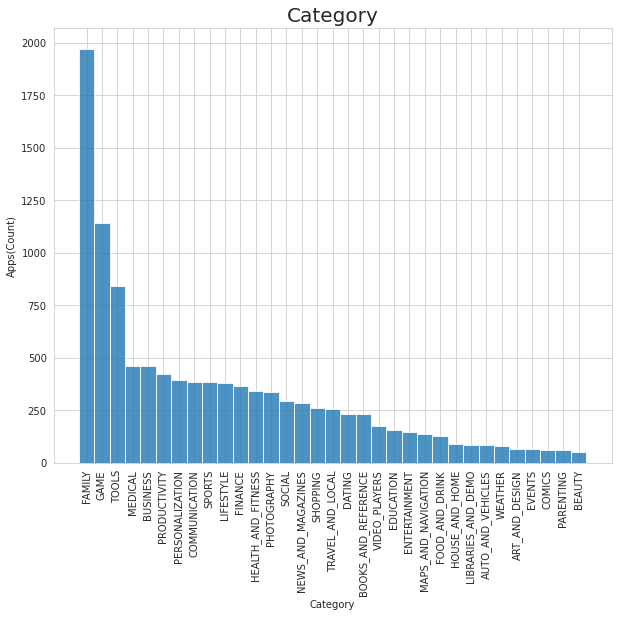

In [78]:
plt.figure(figsize=(10,8));
plt.bar(labels,sizes,width=1, alpha=0.8);
plt.xticks(rotation=90)
plt.title('Category',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Category');
plt.show();


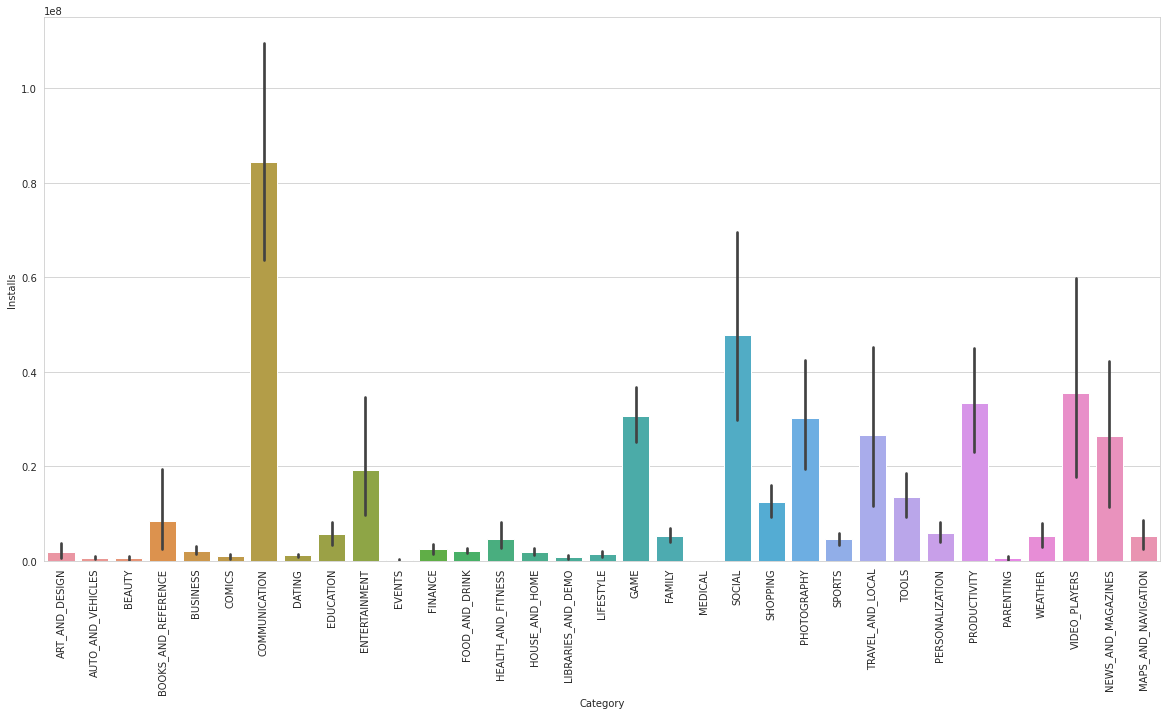

In [79]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Category', y='Installs', data=df1 ,ax=ax);
plt.xticks(rotation=90);


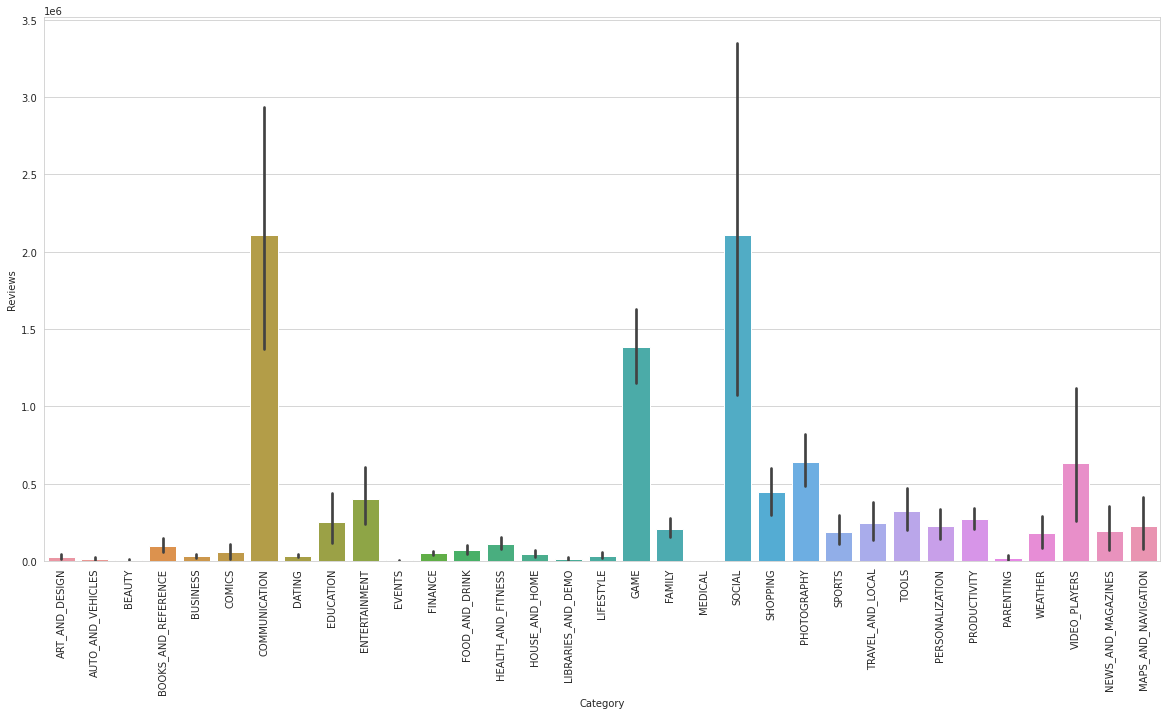

In [80]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(x='Category', y='Reviews',data=df1 ,ax=ax);
plt.xticks(rotation=90);


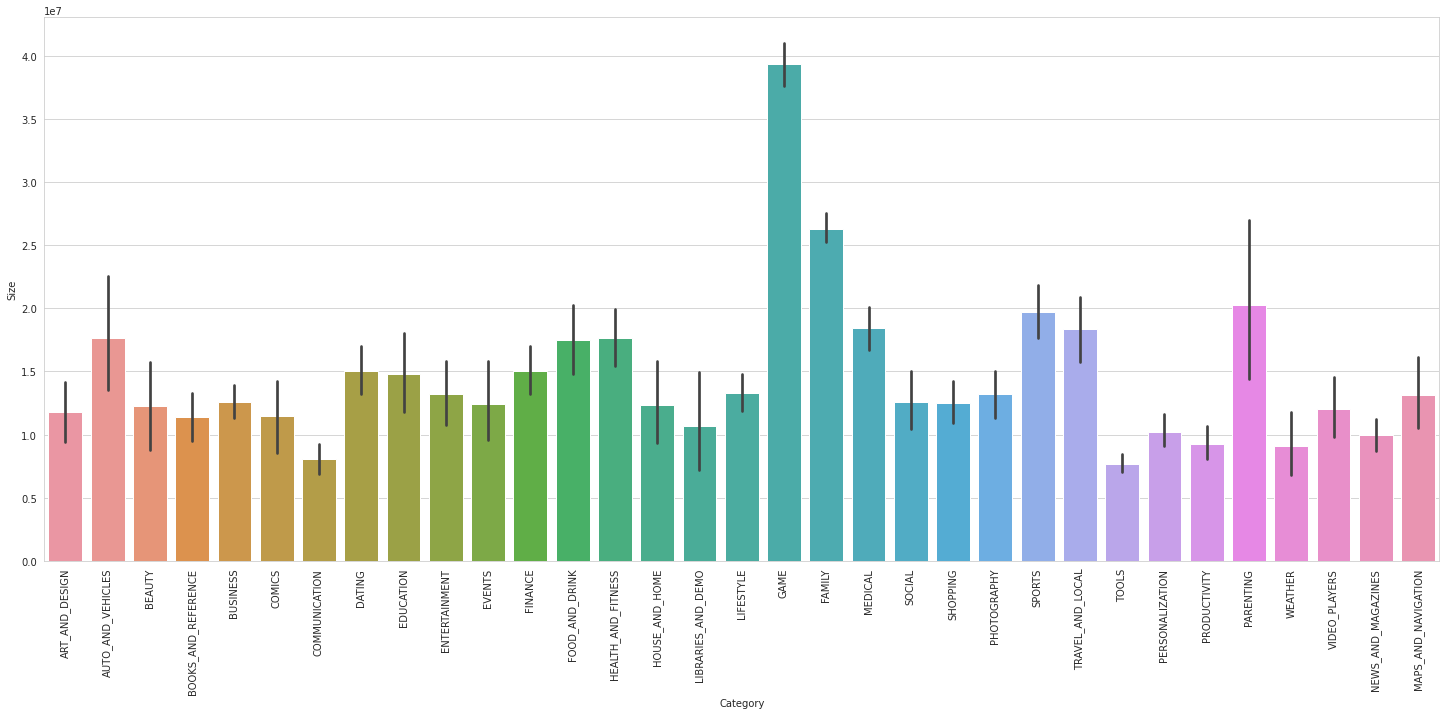

In [81]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='Category', y='Size',data=df1 ,ax=ax);
plt.xticks(rotation=90);


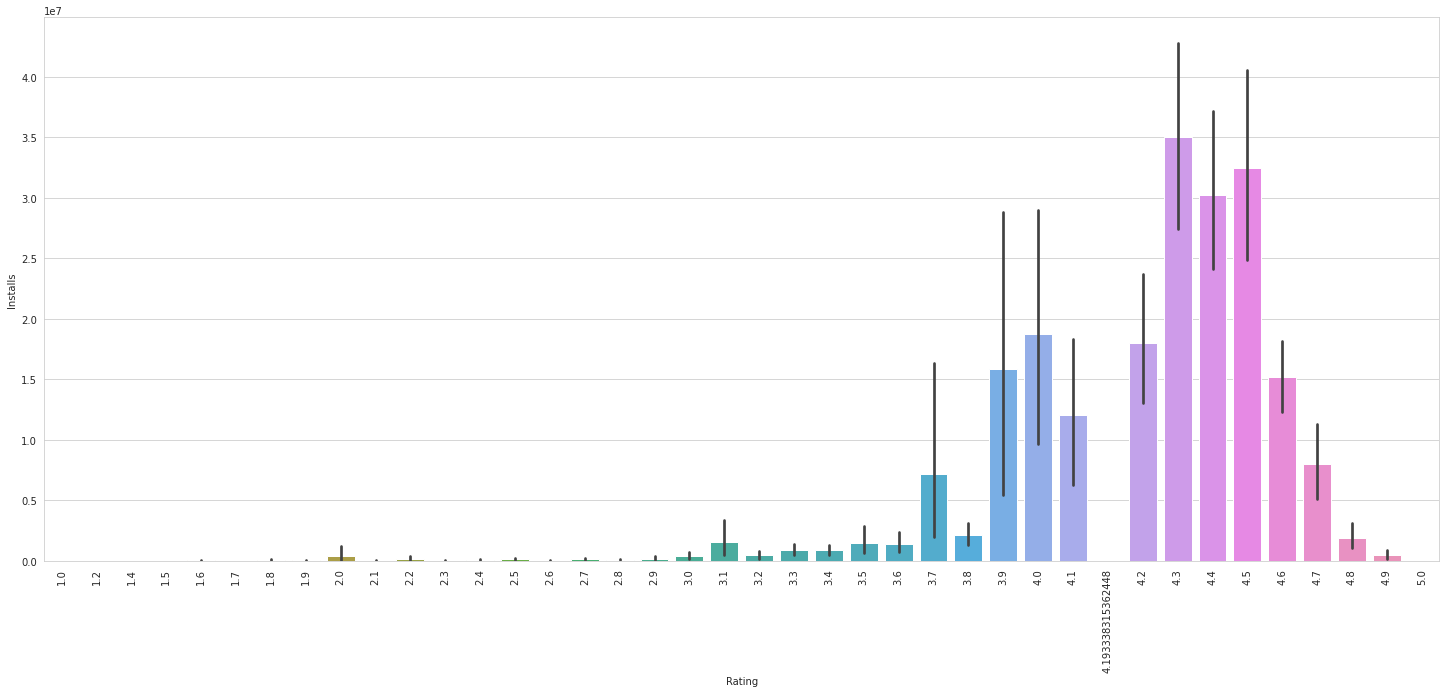

In [82]:
fig, ax = plt.subplots(figsize=(25,10))
sns.barplot(x='Rating', y='Installs',data=df1 ,ax=ax);
plt.xticks(rotation=90);


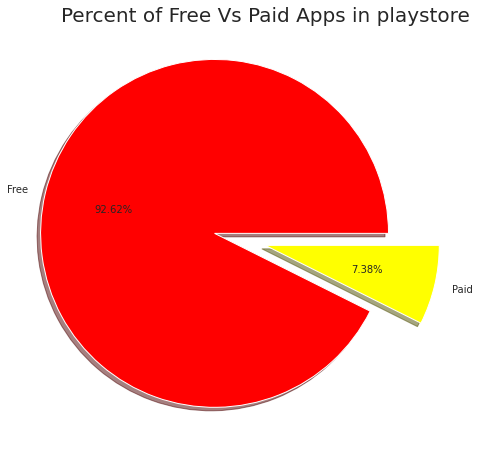

In [83]:
plt.figure(figsize=(8,8))
labels = df1.Type.value_counts(sort = True).index
sizes =df1.Type.value_counts(sort = True)
colors = ["red","yellow"]
explode = (0.3,0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%0.2f%%', shadow=True)
plt.title('Percent of Free Vs Paid Apps in playstore',size = 20)
plt.show()


In [84]:
label = df1['Content Rating'].value_counts(sort = True).index
size =df1['Content Rating'].value_counts(sort = True)
labels = []
sizes = []
for i in range(len(label)):
    labels.append(label[i])
    sizes.append(size[i])

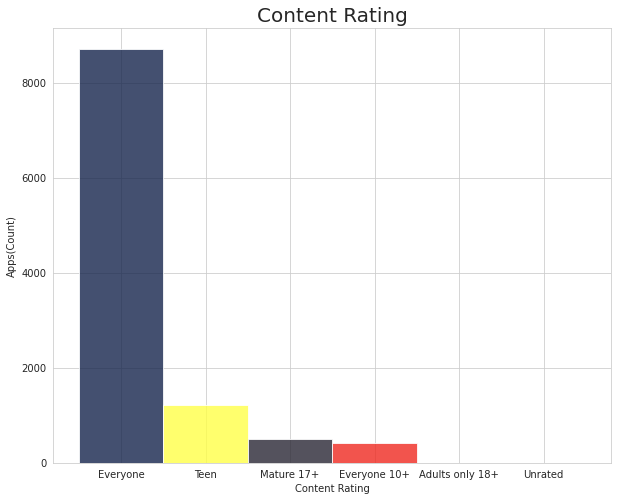

In [85]:
plt.figure(figsize=(10,8))
plt.bar(labels,sizes,width=1,color=['#15244C','#FFFF48','#292734','#EF2920','#CD202D','#ECC5F2'], alpha=0.8);
plt.title('Content Rating',size = 20);
plt.ylabel('Apps(Count)');
plt.xlabel('Content Rating');
plt.show();


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


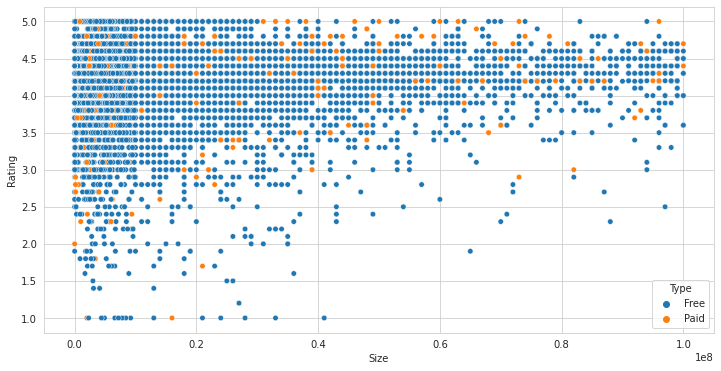

In [86]:
plt.figure(figsize=(12, 6));
sns.scatterplot(df1['Size'],df1['Rating'],hue=df1['Type'],s=30);

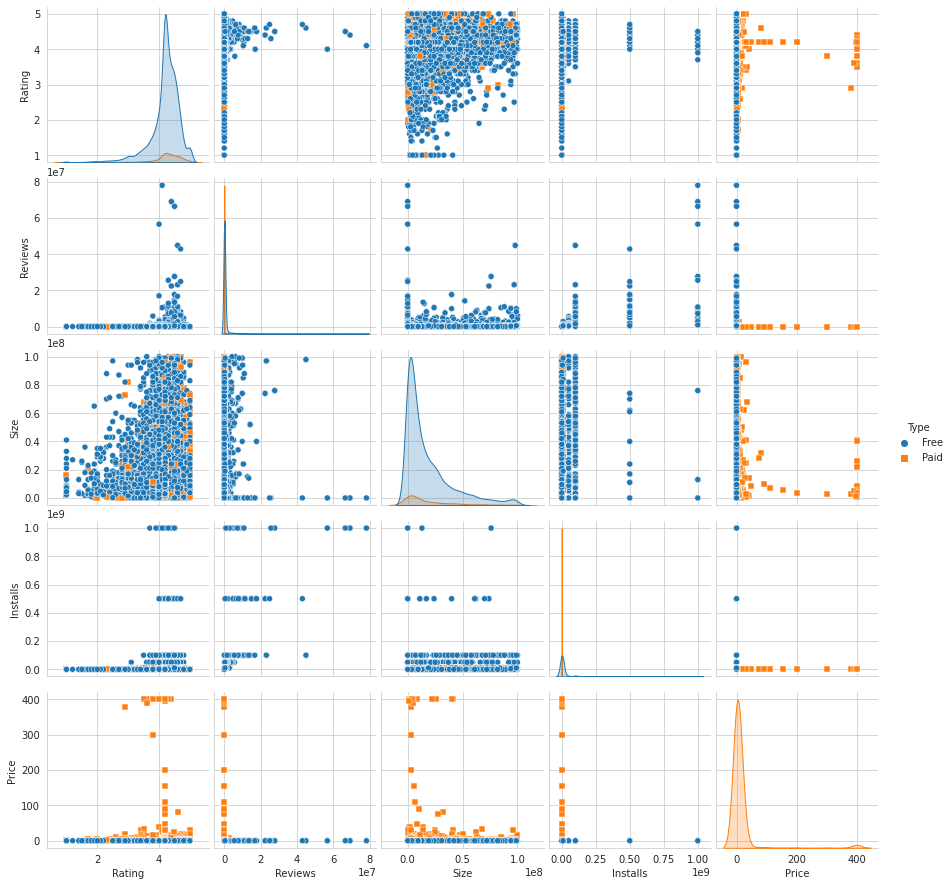

In [87]:
sns.pairplot(df1, hue ='Type',markers=['o','s']) 
plt.show()

In [88]:
df1.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.067950,0.044080,0.051139,-0.020178
Reviews,0.067950,1.000000,0.065458,0.643122,-0.009667
Size,0.044080,0.065458,1.000000,-0.003457,-0.013457
Installs,0.051139,0.643122,-0.003457,1.000000,-0.011689
Price,-0.020178,-0.009667,-0.013457,-0.011689,1.000000


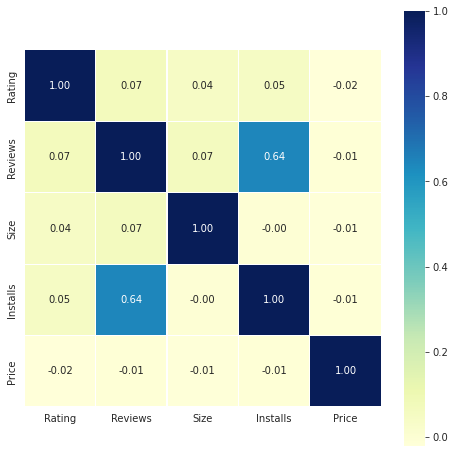

In [89]:
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df1.corr(),cmap="YlGnBu", ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

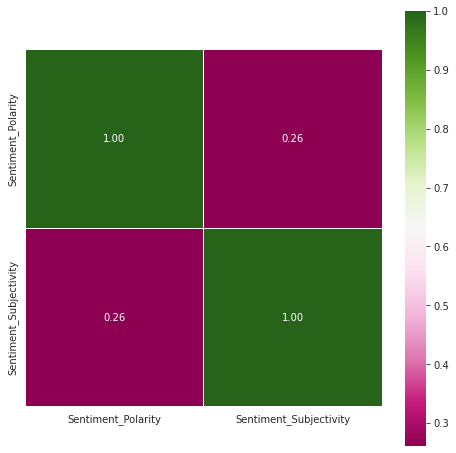

In [90]:
df2.corr()
fig, axes = plt.subplots(figsize=(8, 8))
sns.heatmap(df2.corr(),cmap="PiYG", ax=axes, annot=True, linewidths=0.1, fmt='.2f', square=True)
plt.show()

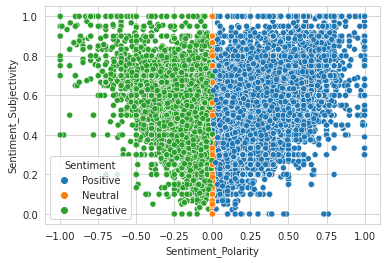

In [91]:
sns.scatterplot(data=df2,x='Sentiment_Polarity',y='Sentiment_Subjectivity', hue ='Sentiment') 
plt.show()

In [92]:
df2.head()

,App,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,Positive,1.00,0.533333
1,10 Best Foods for You,Positive,0.25,0.288462
3,10 Best Foods for You,Positive,0.40,0.875000
4,10 Best Foods for You,Positive,1.00,0.300000
5,10 Best Foods for You,Positive,1.00,0.300000
